# Breat Cancer Detection Logistic Regression Practice Project

So here's a cute little project that I did after an idle prompt at the end of Codecademy's Logistic Regression lesson. They recommended finding a data set for binary classification to practice building logistic regression models, and suggested the Scikit-Learn breast cancer data set in particular. I happen to have an old friend who worked on breast cancer detection techniques in the past, and more speciically machine learning methods to detect breat cancer given a particular set of measurements, so I figured I'd give this project a go.

First off: let's give some credit to the folks who compiled the data set I'm about to use and to the scikit-learn folks who made it available through their open-source software package.

Let's start with a citation to the Scikit-Learn folks: <br>
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011<br>
and, of course, their main website: https://scikit-learn.org/stable/index.html<br>
As documented on https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset, the breast cancer data used in this project comes from UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (https://goo.gl/U2Uwz2); the quoted website says that the data is also available through the UW CS ftp server ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/.<br>
I refer the reader to the Scikit-Learn documentation for an explanation of what the features are and the papers they cited.

# Import the data and get it ready for modeling

Now that I've given some credit to those who compiled the data I'm about to use, we can get started. We'll need to import a fair number of packages, as well as the data itself:

In [1]:
# Importing packages and the data to be used:

from sklearn.datasets import load_breast_cancer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

From Scikit-Learn datasets, we've imported the breast cancer data. The default when one loads a Scikit-Learn data set seems to be an object called a "bunch," although there is an option to import the data as a DataFrame so I will use that:

In [2]:
breast_cancer_data = load_breast_cancer(as_frame = True)

The resulting DataFrame seems to either be a dictionary or contain a dictionary. I did manage to figure out how to get just the features by themselves, and just the targets by themselves, and convert them into Pandas DataFrames to make them easier to work with.

In [3]:
# First, import the features:
all_features = breast_cancer_data.data
pd.DataFrame(all_features)
#print(all_features.columns)

# Then import the targets:
targets = breast_cancer_data.target
pd.DataFrame(targets)
# From the original breast_cancer_data bunch: target_names are 'malignant' and 'benign'. 
# '0' is malignant; '1' is benign
#print(targets)

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


For some reason, when I convert 'target' to a DataFrame, the entire Series is automatically printed out. I've toggled this output to be hidden in the above. And I will also admit to a bit of puzzlement as to why the 'target' data bunch was called 'target': it's really the benign/malignant classification of the particular cell being measured.

# Build the initial model
Now that we have the data in DataFrames, we can start to pluck off the features we want to incorporate in our logistic regression model. While the errors in the reported measurements are valuable information, they aren't of much use to us at the moment so I will leave them out of the list of features we will be considering. I will start off by considering a broad set of features, and will trim the number of model features if needs be. Let's assume that the 'mean' values are more important than 'worse' values, and keep all the 'mean' values and as many 'worst' values as we can without causing the logistic regression algorithm to fail to converge:

In [4]:
# using all of the non-error features causes the logistic regression algorithm to fail to converge.
# features_1 = all_features[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',\
#                          'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',\
#                          'mean fractal dimension', 'worst radius', 'worst texture', 'worst perimeter', \
#                          'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', \
#                          'worst concave points', 'worst symmetry', 'worst fractal dimension']]

# including more 'worst' values than this seems cause the logistic regression algorithm to fail to converge:
features_1 = all_features[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',\
                         'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',\
                         'worst compactness']]

If we're going to be building a supervised machine learning model, it needs to be trained. So, let's split our features and targets up into training and test sets. I will use what seems to be the usual split of 80% training, 20% test. And, I will pick a random state so that I can keep the same splitting of feature rows/target rows if/when I build a model with fewer features below.

In [5]:
feat_train_1, feat_test_1, targ_train_1, targ_test_1 = train_test_split(features_1, targets, train_size = 0.8, \
                                                                        test_size = 0.2, random_state = 1)

# We should make sure the data is appropriately scaled before building our logistic regression model, and to do the
# scaling we will make use of Scikit-Learn's StandardScaler standardization function:
stdscale = StandardScaler()
stdscale.fit_transform(feat_train_1)
stdscale.transform(feat_test_1)

array([[ 0.1318529 , -1.22289689,  0.22619275, ...,  0.34062714,
         1.00887608,  0.69426554],
       [-0.28874137, -0.15799931, -0.26406701, ...,  0.6047969 ,
         1.16313403,  1.03762014],
       [-0.34961686, -0.75871076, -0.3778201 , ..., -0.40362035,
        -0.29864372, -0.31898616],
       ...,
       [-1.43458406, -0.46063046, -1.35313261, ..., -0.14834092,
         1.10069629,  1.16629729],
       [ 0.08757982, -0.00327061,  0.06717876, ..., -0.51665453,
        -1.24255549,  0.05669938],
       [-0.11995025, -0.81104547, -0.16833819, ..., -1.00722285,
        -1.49230646, -0.96366514]])

When I use the .fit_transform() and .transform() functions, the resulting arrays are for some reason automatically printed out, so the output for the above cell has been toggled.

Now that we have training and test sets, and have scaled the feature data, we can build the logistic regression model. We will use Scikit-Learn's LogisticRegression function to do so.

Training score:  0.9274725274725275
Test score:  0.9035087719298246
The number of successes was 103, and the number of failures was 11


Text(0.5, 1.0, 'Number of Successful and Failed Model Predictions')

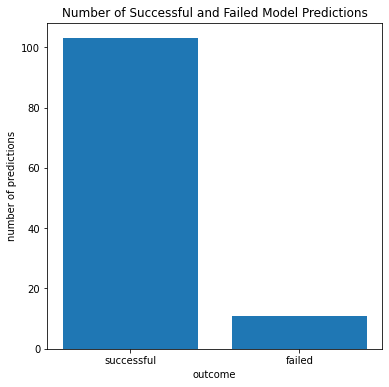

In [6]:
# First build the logistic regression model:
bc_l_r_1 = LogisticRegression()
bc_l_r_1.fit(feat_train_1, targ_train_1)

# Figure out what the training accuracy is:
train_score_1 = bc_l_r_1.score(feat_train_1, targ_train_1)
print('Training score: ', train_score_1)
# So, this model has correctly classified 92.7% of the data. That's not too bad at all!

# Now let's predict what the targets for the features we set aside in the test set should be:
targ_predict_1 = bc_l_r_1.predict(feat_test_1)

# Get the test accuracy:
test_score_1 = bc_l_r_1.score(feat_test_1, targ_test_1)
print('Test score: ', test_score_1)
# All in all, correctly classifying 90.4% of data that the model has never "seen" is not that bad!

# If we wanted to look at a specific row in the test set to see if the the prediction for that particular cell
# was correct or not, we'll need to loop through all cells in the test set to see how the actual classification
# compares with our model's prediction:

# An empty array:
results_1=[]

# Loop over cells to see if the predicted classfication and actual classification match up:
for i in range(len(targ_predict_1)):
    if targ_predict_1[i] == targ_test_1.iloc[i]:
        results_1.append('successful')
    else:
        results_1.append('unsuccessful')

# Count the number of successes and the number of failures:
success_count_1 = results_1.count('successful')
fails_count_1 = results_1.count('unsuccessful')

# Let's set these success/failure counts up for a bar graph visualization. We have two options: The predicted
# classification was successful -- it matched the actual classification -- or it failed. Set up an array stating
# these options, and gather up the counts.
options = ['successful', 'failed']
test_counts_1 =[success_count_1, fails_count_1]

print('The number of successes was {}, and the number of failures was {}'.format(success_count_1,fails_count_1))
     
# Now plot a histogram to visualize the success/failure counts:
plt.figure(figsize=(6,6))
plt.bar(options, test_counts_1)
plt.ylabel('number of predictions')
plt.xlabel('outcome')
plt.title('Number of Successful and Failed Model Predictions')

A 90.4% accuracy rate is not too bad at all!

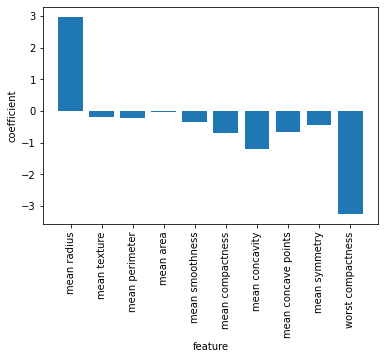

In [7]:
# The below code I borrowed from Codecademy. If we wanted to look at how the coefficients used in the logistic 
# regression analysis compare to each other, with big numbers (in absolute value) having a big impact on the
# probability that a cell belongs to the 'benign' class, and small numbers having a smaller impact, we
# could do:
coefficients = bc_l_r_1.coef_
coefficients = coefficients.tolist()[0]

# and plot a bar graph:
plt.bar([1,2,3,4,5,6,7,8,9,10],coefficients)
plt.xticks([1,2,3,4,5,6,7,8,9,10],['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',\
                                   'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',\
                                   'worst compactness'], rotation = 90)
plt.xlabel('feature')
plt.ylabel('coefficient')

plt.show()

In the model I constructed above, 'mean radius' and 'worst compactness' have the biggest impact on classification probabilities. Mean area has the smallest impact.

# Building a better model
As I mentioned above, I have an old friend who used to work on machine learning methods for breast cancer detection, so I have an educated guess about what sorts of features are most important when trying to classify a given cell as benign or malignant. Symmetry and compactness will be very important, and I think radius and area will be as well. I'm also going to play around a bit with including "worst" measurements in addition to "mean" measurements. Let us use these educated guesses to see if we can build a better model:

In [8]:
# I did not exhaustively check every possible combination of non-error features to include in my model, but this 
# particular set of features yields a model with a very good accuracy score:

features_2 = all_features[['mean radius', 'mean area', 'mean compactness', 'mean symmetry',\
                           'worst compactness', 'worst area','worst symmetry']]

feat_train_2, feat_test_2, targ_train_2, targ_test_2 = train_test_split(features_2, targets, train_size = 0.8, \
                                                                        test_size = 0.2, random_state = 1)

# Let's make sure this data is scaled:
stdscale = StandardScaler()
stdscale.fit_transform(feat_train_2)
stdscale.transform(feat_test_2)

array([[ 1.31852898e-01, -2.34206920e-02,  1.51274076e+00,
         1.00887608e+00,  6.94265543e-01, -1.53047819e-01,
        -9.82723318e-02],
       [-2.88741373e-01, -3.58866675e-01,  3.47480894e-01,
         1.16313403e+00,  1.03762014e+00, -2.36812357e-01,
         1.72716717e+00],
       [-3.49616860e-01, -4.16568905e-01, -4.93624864e-01,
        -2.98643722e-01, -3.18986164e-01, -5.29483636e-01,
         8.42518018e-01],
       [ 1.13353136e+00,  1.03923905e+00, -3.92507272e-01,
        -6.98979841e-01, -7.52108652e-02,  8.57509103e-01,
         5.46500801e-01],
       [ 2.53603872e-01,  1.51618611e-01, -1.13654014e+00,
         1.49438907e-01, -1.01823977e+00,  5.24948839e-02,
         5.92434507e-01],
       [ 5.38611832e-01,  4.00925378e-01,  4.49561511e-01,
         1.28066390e+00,  3.19226621e-01,  4.62234674e-01,
         1.01264285e+00],
       [ 1.37703331e+00,  1.35950024e+00,  2.58882624e-01,
        -2.58242829e-01, -3.52610343e-01,  1.00048070e+00,
        -7.5155170

The output for the cell above has been toggled.

Now that we've selected a set of features for our logistic regression model, and made sure they were scaled, let's build it and see how it performs:

Training score:  0.945054945054945
Test score:  0.9473684210526315
The number of successes was 108, and the number of failures was 6


Text(0.5, 1.0, 'Number of Successful and Failed Model Predictions')

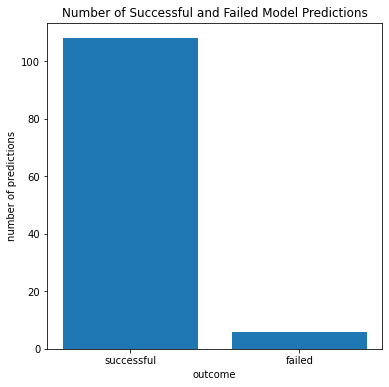

In [9]:
# Build the model:
bc_l_r_2 = LogisticRegression()
bc_l_r_2.fit(feat_train_2, targ_train_2)

# Determine the accuracy:
train_score_2 = bc_l_r_2.score(feat_train_2, targ_train_2)
print('Training score: ', train_score_2)

# Predict targets for the feature test set:
targ_predict_2 = bc_l_r_2.predict(feat_test_2)

# Determine the accuracy:
test_score_2 = bc_l_r_2.score(feat_test_2, targ_test_2)
print('Test score: ', test_score_2)

# Initialize an empty array:
results_2=[]

# Loop through cells in the test set to see which classifications were correct, and which ones weren't:
for i in range(len(targ_predict_2)):
    if targ_predict_2[i] == targ_test_2.iloc[i]:
        results_2.append('successful')
    else:
        results_2.append('unsuccessful')

# Count up the number of successes and the number of failures:
success_count_2 = results_2.count('successful')
fails_count_2 = results_2.count('unsuccessful')

# Gather arrays to be used in plotting a bar graph of the results:
options = ['successful', 'failed']
test_counts_2 =[success_count_2, fails_count_2]

print('The number of successes was {}, and the number of failures was {}'.format(success_count_2,fails_count_2))
        
# Plot the bar graph of results:

plt.figure(figsize=(6,6))
plt.bar(options, test_counts_2)
plt.xlabel('outcome')
plt.ylabel('number of predictions')
plt.title('Number of Successful and Failed Model Predictions')

This model performed even better than the last one! We've been able to boost our accuracy rate to 94.7%, which is a very high accuracy indeed.

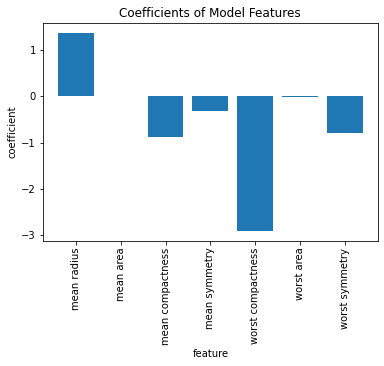

In [10]:
# Code again borrowed from Codecademy to take a look at the model coefficients:
coefficients = bc_l_r_2.coef_
coefficients = coefficients.tolist()[0]

# Plot a bar graph of coefficients:
plt.bar([1,2,3,4,5,6,7],coefficients)
plt.xticks([1,2,3,4,5,6,7],['mean radius', 'mean area', 'mean compactness', 'mean symmetry',\
                           'worst compactness', 'worst area','worst symmetry'], rotation = 90)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.title('Coefficients of Model Features')
plt.show()

Again, "mean radius" and "worst compactness" are the most important features, and "mean area" is the least important. Interestingly, when I tried to remove "mean area" from the list of model features, the model performed worse. Perhaps there is some underlying degeneracy with some other cell feature(s) that I am not seeing which causes its absence to degrade model performance.

# Conclusions

We used the Scikit-Learn breast cancer data set to get some practice building a logistic regression model. The best model I was able to construct was one whose features included "mean radius", "mean area", "mean compactness", "mean symmetry", "worst compactness", "worst area", and "worst symmetry;" this model had an accuracy of 94.7%, and misclassified only 6 cells in the test set. 

# Limitations

As I mentioned above, I did not exhaustively try every combination of non-error features possible to try to determine what the absolute "best" model for this data is. So, there could well be a set of features which results in a better model that I did not find. Also, as the Scikit-Learn folks mentioned, this is a relatively small data set so changing the random state (which determines which rows end up in the train set and which rows end up in the test set) will doubtless impact model performance. Also, since this is a small data set, the model built herein should in no way, shape, or form be construed as the best way to tell if a patient has breast cancer given measurements from a fine needle aspirate imaging method. This model was built for the purposes of practicing logistic regression and has no broader applications other than serving as a practice exercise.